# Part 1: A/A tests for Normal Distribution

- split the users into two groups & assign the same treatment to both groups 
- In repeated trials, 5% of the time a given metric should be statistically significant & p < 0.05. 
- conduct t-tests to compute p-values & the distribution of p-values from repeated trials form a uniform distribution 

# 1. simulate the hashing process & single iteration

In [4]:
import numpy as np

# 1: population
np.random.seed(123)

population = np.random.normal(loc = 100, scale = 5, size = 1000)

In [5]:
import random

A_1 = []

A_2 = []

for i in population:
    
    hash_val = random.random()
    
    if hash_val <= 0.5:
        A_2.append(i)
        
    else:
        A_1.append(i)
        
# two sample t test 
from scipy import stats

stats.ttest_ind(A_1,A_2)

Ttest_indResult(statistic=-0.5697163252872851, pvalue=0.568998328712083)

# 2. run A/A 10,000 times & check False Positive Rate

In [2]:
import random
from scipy import stats

### solution 1: eyeball 

In [6]:
count_5_perc = 0 #False Positives
count_10_perc = 0
count_20_perc = 0
count_30_perc = 0
count_40_perc = 0
count_50_perc = 0
count_60_perc = 0
count_70_perc = 0
count_80_perc = 0
count_90_perc = 0

for i in range(10000):
    
    A_1 = []
    
    A_2 = []
    
    for j in population:
        
        hash_val = random.random()
        
        if hash_val <= 0.5:
            A_2.append(j)
        
        else:
            A_1.append(j)
        
    result = stats.ttest_ind(A_1,A_2)
        
    if result.pvalue <= 0.1:
        count_10_perc+=1
        
    elif 0.1<result.pvalue<=0.2:
        count_20_perc+=1
    
    elif 0.2<result.pvalue<=0.3:
        count_30_perc+=1
        
    elif 0.3<result.pvalue<=0.4:
        count_40_perc+=1
        
    elif 0.4<result.pvalue<=0.5:
        count_50_perc+=1
        
    elif 0.5<result.pvalue<=0.6:
        count_60_perc+=1
        
    elif 0.6<result.pvalue<=0.7:
        count_70_perc+=1
        
    elif 0.7<result.pvalue<=0.8:
        count_80_perc+=1
        
    elif 0.8<result.pvalue<=0.9:
        count_90_perc+=1

In [7]:
count_10_perc/10000

0.0997

In [8]:
count_20_perc/10000

0.1035

In [9]:
count_30_perc/10000

0.0986

In [10]:
count_40_perc/10000

0.0946

In [11]:
count_40_perc/10000

0.0946

In [12]:
count_50_perc/10000

0.1012

In [13]:
count_60_perc/10000

0.099

In [14]:
count_70_perc/10000

0.1038

In [15]:
count_80_perc/10000

0.1004

In [16]:
count_90_perc/10000

0.0984

---

In [17]:
# solution 2: perform a formal test using the Kolmogorov-Smirnov test (one-sample) for goodness of fit.

import numpy as np
import scipy

p_values = []

for i in range(10000):
    
    A_1 = []
    
    A_2 = []
    
    for j in population:
        
        hash_val = random.random()
        
        if hash_val <= 0.5:
            A_2.append(j)
        
        else:
            A_1.append(j)
        
    result=(stats.ttest_ind(A_1,A_2))
    p_values.append(result.pvalue)

In [18]:
import scipy
scipy.stats.kstest(p_values,"uniform")

KstestResult(statistic=0.004665761913861394, pvalue=0.9814238402972115)

# Conclusion: 
- fail to reject the null hypothesis and conclude the p-values from the A/A tests follow a uniform distribution

In [30]:
# The null hypothesis for kstest test assumes that the given data follows the specified distribution.
# small p-value --> different distributions 
# big p-value --> same distributions
import numpy as np
import scipy


dddd = np.random.normal(0,1,1000)
kstest(dddd,'norm')

KstestResult(statistic=0.9999999999998767, pvalue=0.0)

In [20]:
from scipy import stats
x = np.linspace(-25, 17, 6)
stats.kstest(x, 'norm')

KstestResult(statistic=0.4999999999999999, pvalue=0.06558641975308652)

In [24]:
from scipy.stats import kstest
import numpy as np

x = np.random.normal(0,1,1000)
test_stat = kstest(x, 'norm')
test_stat

KstestResult(statistic=0.03859901423041939, pvalue=0.09899489774451381)

---

# split at 0.2%

In [21]:
# solution 2

import numpy as np
import scipy

p_values = []

for i in range(10000):
    
    A_1 = []
    
    A_2 = []
    
    for j in population:
        
        hash_val = random.random()
        
        if hash_val <= 0.2:
            A_2.append(j)
        
        else:
            A_1.append(j)
        
    result=(stats.ttest_ind(A_1,A_2))
    
    p_values.append(result.pvalue)

In [22]:
import scipy
scipy.stats.kstest(p_values,"uniform")

KstestResult(statistic=0.009005414094706121, pvalue=0.39198360324923237)

----

# Part 2: A/A tests for Left Skewed Distribution with Heavy Users

In [1]:
# generate skewed distribution 
# source: https://stackoverflow.com/questions/24854965/create-random-numbers-with-left-skewed-probability-distribution

from scipy.stats import skewnorm
import matplotlib.pyplot as plt

numValues = 10000
maxValue = 1000
skewness = -50   #Negative values are left skewed, positive values are right skewed.

random_1 = skewnorm.rvs(a = skewness,loc=maxValue, size=numValues)  #Skewnorm function

#random_1 = random_1 - min(random_1)      #Shift the set so the minimum value is equal to zero.
#random_1 = random_1 / max(random_1)      #Standadize all the vlues between 0 and 1. 
#random_1 = random_1 * maxValue         #Multiply the standardized values by the maximum value.

#Plot histogram to check skewness
plt.hist(random_1,30,density=True, color = 'red', alpha=0.1)
plt.show()

<Figure size 640x480 with 1 Axes>

In [2]:
random_1

array([999.9315308 , 999.00985561, 998.7830595 , ..., 999.56253601,
       999.87125823, 997.82424896])

In [3]:
#2. simulate the hashing process & single iteration

import random

A_1 = []

A_2 = []

for i in random_1:
    
    hash_val = random.random()
    
    if hash_val <= 0.5:
        A_2.append(i)
        
    else:
        A_1.append(i)
        
# two sample t test 
from scipy import stats

stats.ttest_ind(A_1,A_2)

Ttest_indResult(statistic=0.7640304333604793, pvalue=0.44486713677102585)

In [4]:
#2. run A/A 10,000 times & check False Positive Rate
import random
from scipy import stats

In [5]:
count_5_perc = 0 #False Positives
count_10_perc = 0
count_20_perc = 0
count_30_perc = 0
count_40_perc = 0
count_50_perc = 0
count_60_perc = 0
count_70_perc = 0
count_80_perc = 0
count_90_perc = 0

for i in range(10000):
    
    A_1 = []
    
    A_2 = []
    
    for j in random_1:
        
        hash_val = random.random()
        
        if hash_val <= 0.05:
            A_2.append(j)
        
        else:
            A_1.append(j)
        
    result = stats.ttest_ind(A_1,A_2)
        
    if result.pvalue <= 0.1:
        count_10_perc+=1
        
    elif 0.1<result.pvalue<=0.2:
        count_20_perc+=1
    
    elif 0.2<result.pvalue<=0.3:
        count_30_perc+=1
        
    elif 0.3<result.pvalue<=0.4:
        count_40_perc+=1
        
    elif 0.4<result.pvalue<=0.5:
        count_50_perc+=1
        
    elif 0.5<result.pvalue<=0.6:
        count_60_perc+=1
        
    elif 0.6<result.pvalue<=0.7:
        count_70_perc+=1
        
    elif 0.7<result.pvalue<=0.8:
        count_80_perc+=1
        
    elif 0.8<result.pvalue<=0.9:
        count_90_perc+=1

In [6]:
count_10_perc/10000

0.0956

In [7]:
count_20_perc/10000

0.1017

In [8]:
count_30_perc/10000

0.1025

In [9]:
# solution 2: perform the formal test using the Kolmogorov-Smirnov test (one-sample) for goodness of fit.

import numpy as np
import scipy

p_values = []

for i in range(10000):
    
    A_1 = []
    
    A_2 = []
    
    for j in random_1:
        
        hash_val = random.random()
        
        if hash_val <= 0.05:
            A_2.append(j)
        
        else:
            A_1.append(j)
        
    result=(stats.ttest_ind(A_1,A_2))
    p_values.append(result.pvalue)

In [10]:
import scipy
scipy.stats.kstest(p_values,"uniform")

KstestResult(statistic=0.009942002617743362, pvalue=0.27626867831161056)

---

# Part 3: can randomization lead to balanced distribution with heavy users (small percent)?

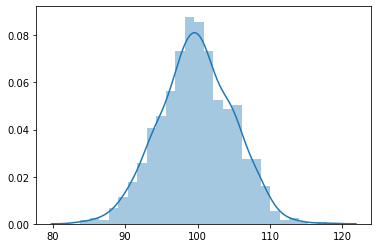

In [49]:
import numpy as np
import seaborn as sns

# 1: population
np.random.seed(123)

regular_user = np.random.normal(loc = 100, scale = 5, size = 1000)
sns.distplot(regular_user)

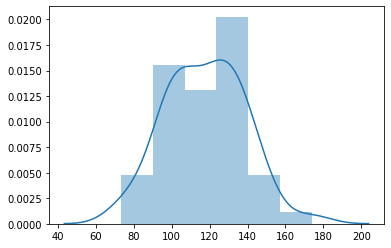

In [55]:
# 5% heavy users 
heavy_users = np.random.normal(loc=120,scale = 25,size = 50)
sns.distplot(heavy_users)

In [56]:
total_user = []

for i in heavy_users:
    total_user.append(i)
for j in regular_user:
    total_user.append(j)

In [60]:
#1. simulate the hashing process & single iteration

import random

A_1 = []

A_2 = []

for i in total_user:
    
    hash_val = random.random()
    
    if hash_val <= 0.5:
        A_2.append(i)
        
    else:
        A_1.append(i)
        
# two sample t test 
from scipy import stats

stats.ttest_ind(A_1,A_2)

Ttest_indResult(statistic=0.40481427665266323, pvalue=0.6856966445371957)

In [61]:
# no difference 

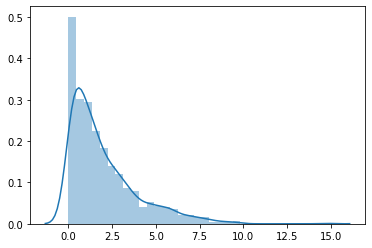

In [72]:
exponential = np.random.exponential(scale=2, size=1000)
sns.distplot(exponential)

In [73]:
#1. simulate the hashing process & single iteration

import random

A_1 = []

A_2 = []

for i in exponential:
    
    hash_val = random.random()
    
    if hash_val <= 0.5:
        A_2.append(i)
        
    else:
        A_1.append(i)
        
# two sample t test 
from scipy import stats

stats.ttest_ind(A_1,A_2)

Ttest_indResult(statistic=0.1348387526112502, pvalue=0.8927665540225909)

---

# Part 4: Check for Variability 

In [23]:
# Bootstrap & 70% sample size

boot_diffs = []

for i in range(10000):
    boot_sample_1 = np.random.choice(A_1, replace=False, size = int(0.7*len(A_1)))
    
    boot_sample_2 = np.random.choice(A_2, replace= False, size = int(0.7*len(A_2)))
    
    result = stats.ttest_ind(boot_sample_1,boot_sample_2)

    boot_diffs.append(result.pvalue)

In [25]:
count= 0 

for i in boot_diffs:
    if i < 0.05:
        count+=1
        
count/len(boot_diffs)

0.0004

---

In [26]:
# Bootstrap & 80% sample size

boot_diffs = []

for i in range(10000):
    boot_sample_1 = np.random.choice(A_1, replace=False, size = int(0.8*len(A_1)))
    
    boot_sample_2 = np.random.choice(A_2, replace= False, size = int(0.8*len(A_2)))
    
    result = stats.ttest_ind(boot_sample_1,boot_sample_2)

    boot_diffs.append(result.pvalue)

In [27]:
count= 0 

for i in boot_diffs:
    if i < 0.05:
        count+=1
        
count/len(boot_diffs)

0.0001

---

In [28]:
# Bootstrap & 90% sample size

boot_diffs = []

for i in range(10000):
    boot_sample_1 = np.random.choice(A_1, replace=False, size = int(0.9*len(A_1)))
    
    boot_sample_2 = np.random.choice(A_2, replace= False, size = int(0.9*len(A_2)))
    
    result = stats.ttest_ind(boot_sample_1,boot_sample_2)

    boot_diffs.append(result.pvalue)

In [29]:
count= 0 

for i in boot_diffs:
    if i < 0.05:
        count+=1
        
count/len(boot_diffs)

0.0

# Conclusion 1: for equal split & 90% sample size, the p value is 0.0101 (False Positive Rate);
- Note: set replace = False; otherwise, it returns a high p value

---

In [93]:
# Bootstrap & 100% sample size

boot_diffs_2 = []

for i in range(10000):
    
    boot_sample_1 = np.random.choice(A_1, replace=False, size = len(A_1))
    
    boot_sample_2 = np.random.choice(A_2, replace= False, size = len(A_2))
    
    result = stats.ttest_ind(boot_sample_1,boot_sample_2)

    boot_diffs_2.append(result.pvalue)

In [94]:
count= 0 
for i in boot_diffs_2:
    if i < 0.05:
        count+=1
count/len(boot_diffs_2)

0.0

In [97]:
set(boot_diffs_2)

{0.19427810106851318,
 0.19427810106856205,
 0.19427810106856214,
 0.1942781010685622,
 0.19427810106861107,
 0.19427810106866003}

# Conclusion 2: for equal split & 100% sample size, 0 percent of observing different distributions (False Positive Rate)
- Note: set replace = False; otherwise, it returns a high p value

---

# Test for SRM & use a chi-square test

In [30]:
from scipy.stats import chisquare 
half = int((len(A_1)+len(A_2))/2)
chisquare([len(A_1),len(A_2)],f_exp = [half,half])

Power_divergenceResult(statistic=25.0, pvalue=5.733031437583875e-07)

# Conclusion 3: p_value = 0.327 & no SRM